In [14]:
""" 1 dim switching input """ 

import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,1000000
N = 100
C = 0.9
rho = 0
dim = 1
idWin = False


N_d = int(N * dim)
maxtau = int(N_d * 2)
taus = np.arange(1,maxtau)



torch.manual_seed(0)



#u_asym = torch.rand(1, Two + Ttrain)

x = torch.normal(0,1,(1,Two+Ttrain),device="cuda:0")
y = torch.rand((1,Two+Ttrain))
u_both=torch.vstack((x,y))

u_sym = torch.tensor([[ u_both[int(t%2),t] for t in range(Two+Ttrain)]])


esn = ESN.ESN_mult(N_d, uC=C, dim=dim,rseed=0,idWin=idWin)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity",bias=False)
print("runtime :",time.time()-st)

st = time.time()
#
raw,lin,rev,sur = ESN.MC_cSVD_asym(u_sym, Xwo, maxtau,ret_all=True)
#raw_tilde,lin_tilde,rev_tilde,sur_tilde = ESN.MC_cSVD_asym(u_tilde, Xwo, maxtau,ret_all=True)


mfs=rev
#mfs_tilde=rev_tilde

print("calc time :",time.time()-st)


runtime : 116.7307345867157
calc time : 0.511723518371582


In [15]:

totMC = torch.sum(mfs).cpu().numpy()
#totMC_tilde = torch.sum(mfs_tilde).cpu().numpy()
#print("totMC_tilde : ",totMC_tilde)
print(f"totMC:{totMC}\nsurrogate value: {sur.cpu().numpy()}")



totMC:109.47589723694594
surrogate value: [0.00010136]


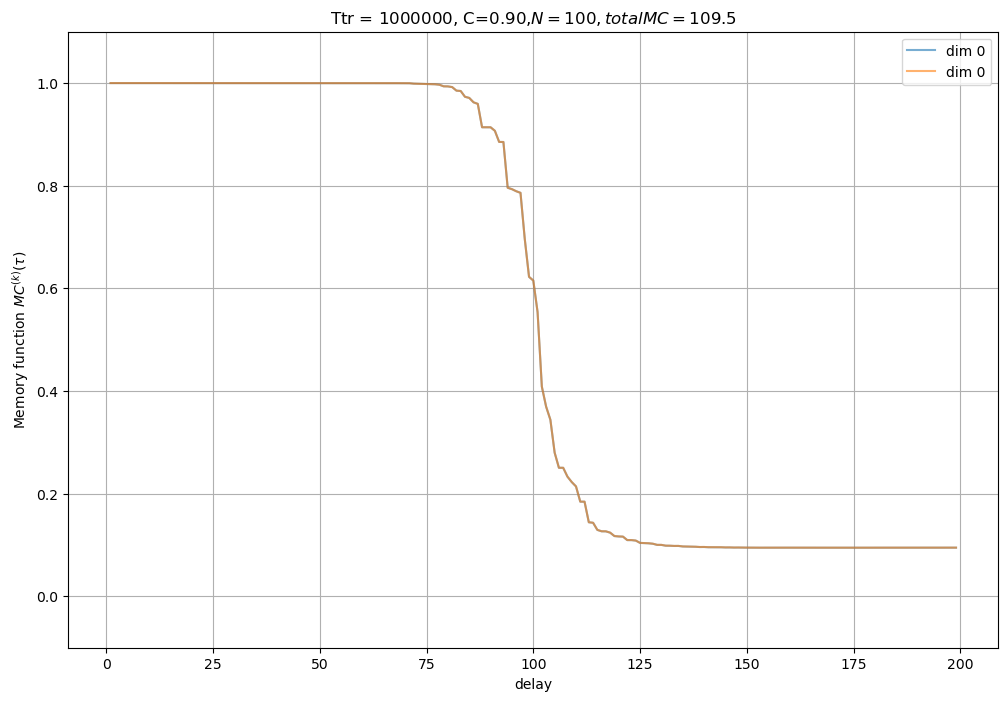

In [16]:
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    plt.plot(taus,raw[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    
    #plt.plot(taus,mfs_tilde[d].cpu().numpy(),alpha=0.6,label= "dim "+str(d)+" (normalized)")
    
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

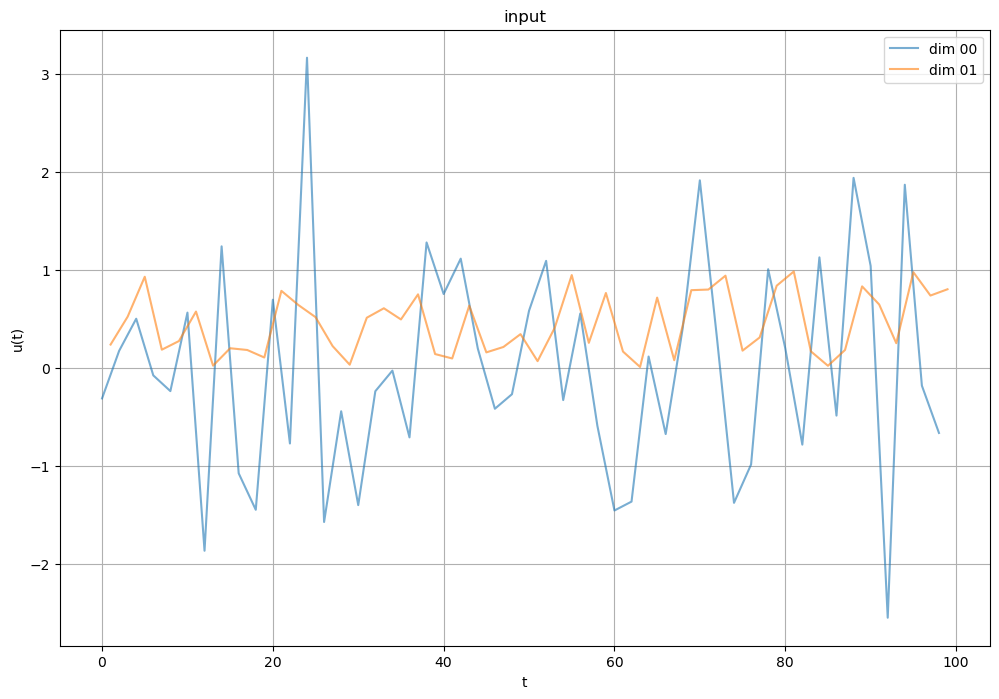

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
mfs = rev
maxT=100
str_d=2
t=np.arange(int(maxT/str_d))


for d in range(str_d):
    y=[u_sym[0,time*2+d].cpu().numpy()  for time in t]
    plt.plot(t*2+d, y,alpha=0.6,label="dim "+str(d))

    
#plt.ylim(-0.1,1.1)
plt.xlabel("t")
plt.ylabel(r'u(t)')
plt.title(r"input")
#
plt.legend()
plt.grid(True)